In [1]:
!nvidia-smi

Sun Jan  7 14:34:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   34C    P8               7W /  95W |    178MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# 1. Import libraries

In [4]:
# Important library imports
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
from fastai.imports import *
from fastai.vision.data import ImageDataLoaders
from PIL import Image
from fastai.vision.core import PILImage
import os
#import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
#from keras.preprocessing import image
import keras.utils as image
from keras.utils import load_img, img_to_array

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

C:\Users\mauii\anaconda3\envs\tfgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Set path for data

## a. Training data

In [5]:
x_train  = 'ColorClassification/Training'
path_train = Path(x_train)
path_train.ls()

(#9) [Path('ColorClassification/Training/Black'),Path('ColorClassification/Training/Blue'),Path('ColorClassification/Training/Brown'),Path('ColorClassification/Training/Green'),Path('ColorClassification/Training/orange'),Path('ColorClassification/Training/red'),Path('ColorClassification/Training/Violet'),Path('ColorClassification/Training/White'),Path('ColorClassification/Training/yellow')]

## b. Test Data

In [6]:
x_test  = 'ColorClassification/Testing/'
x_test

'ColorClassification/Testing/'

# 3. Download data for training

In [7]:
# Load data
np.random.seed(40)
data = ImageDataLoaders.from_folder(path_train, train = '.', valid_pct=0.2,
                                  item_tfms=Resize(225))

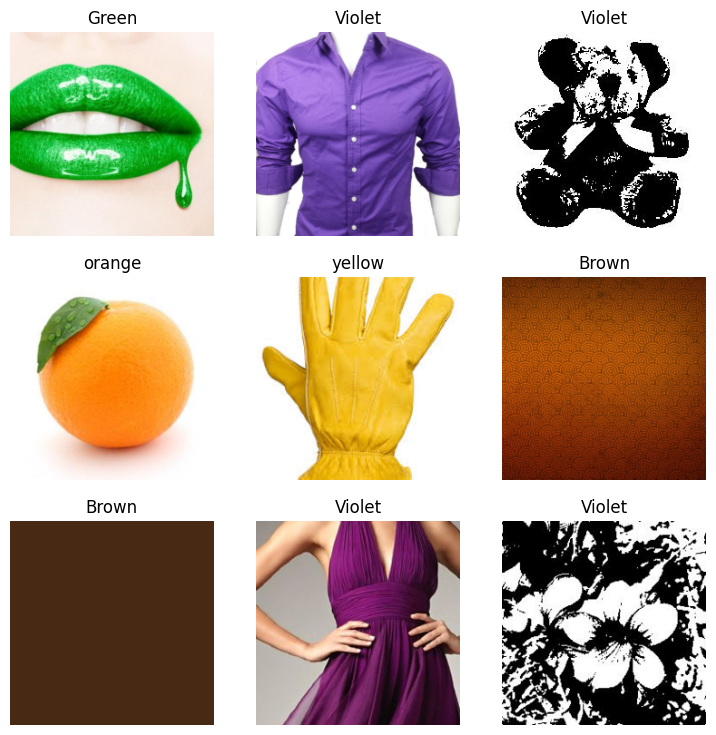

In [8]:
# Exploration of the data 
data.show_batch()

In [10]:
# Knowing more about the data
print('The dataset have: ' + str(data.c) + ' classes')
print('The training dataset has a size of: ' + str(len(data.train_ds)))
print('The validation dataset has a size of: ' + str(len(data.valid_ds)))

The dataset have: 9 classes
The training dataset has a size of: 94
The validation dataset has a size of: 23


# 4. Model Creation (ResNet18)

In [11]:
# ResNet18 CNN Model
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

C:\Users\mauii\anaconda3\envs\tfgpu\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\mauii\anaconda3\envs\tfgpu\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\mauii\anaconda3\envs\tfgpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# 5. Find LR

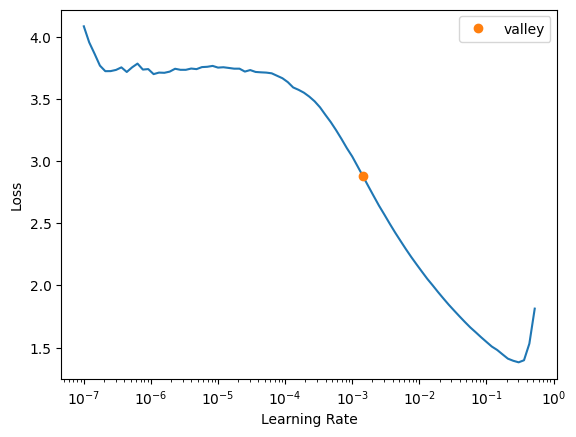

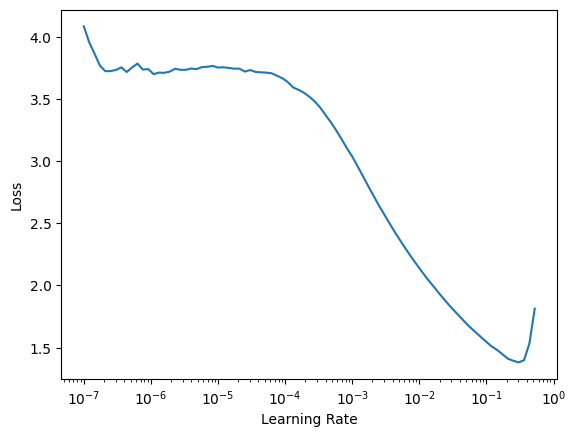

In [12]:
learn.lr_find()
learn.recorder.plot_lr_find()

# Model Training

In [13]:
lr1 = 1e-2
lr2 = 3e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,3.939360,8.705290,0.217391,00:03
1,2.323390,7.502593,0.304348,00:03
2,1.815405,10.124416,0.304348,00:03
3,1.388667,17.010473,0.391304,00:03
4,1.262257,20.468725,0.347826,00:03
5,1.136087,23.225946,0.434783,00:03
6,1.132441,33.329945,0.304348,00:03
7,1.099058,43.748016,0.478261,00:03
8,1.117477,51.498043,0.304348,00:03
9,1.147599,50.989300,0.347826,00:03


# 7. Hyperparameter

In [14]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.107886,4.456828,0.956522,00:04
1,0.121756,4.771019,0.956522,00:04
2,0.295921,5.688060,0.956522,00:04
3,0.219684,7.493078,0.913043,00:04
4,0.516321,7.436702,0.913043,00:04
5,0.716504,5.526046,0.869565,00:04
6,0.734409,7.375155,0.869565,00:04
7,0.740791,8.954962,0.826087,00:04
8,0.678438,15.351875,0.782609,00:04
9,0.676570,28.144329,0.782609,00:04


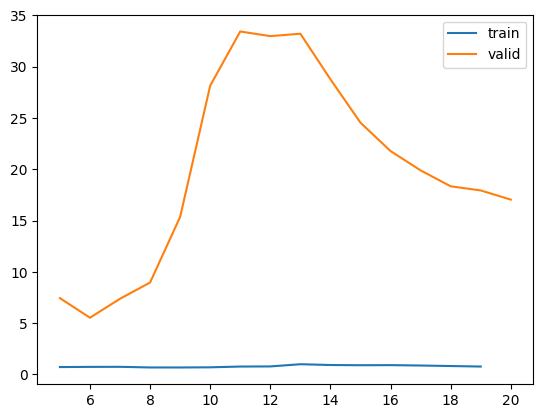

In [15]:
learn.recorder.plot_loss()

# 8. Result interpretation

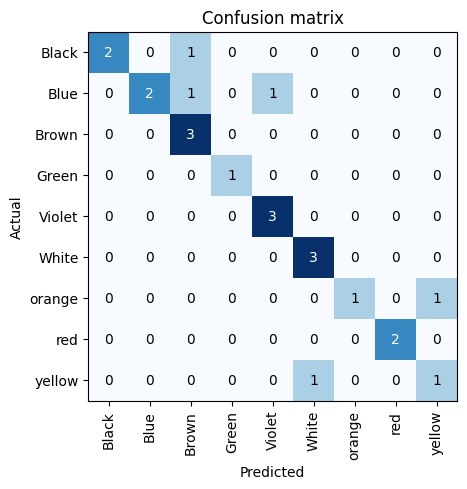

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

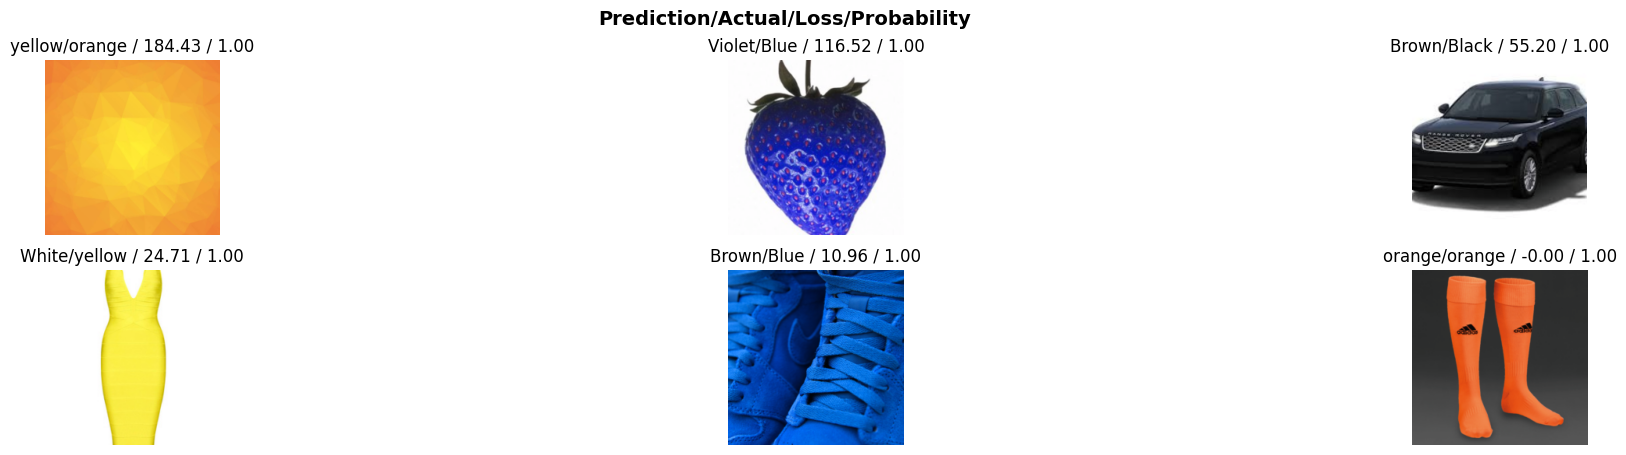

In [17]:
interp.plot_top_losses(6,figsize = (25,5))

# 9. Prediction

In [23]:
for i in range(1, 97):
    print(i, '.', learn.predict('ColorClassification/Testing/' + str(i) + '.jpg')[0])

1 . Green


2 . Green


3 . Blue


4 . White


5 . Violet


6 . red


7 . red


8 . yellow


9 . White


10 . orange


11 . orange


12 . Green


13 . Violet


14 . Black


15 . Black


16 . Black


17 . Black


18 . Black


19 . Black


20 . Black


21 . Black


22 . Black


23 . Black


24 . Black


25 . Blue


26 . Blue


27 . Blue


28 . Violet


29 . Blue


30 . Blue


31 . Blue


32 . Blue


33 . Violet


34 . Green


35 . Green


36 . Green


37 . Green


38 . Green


39 . Green


40 . Green


41 . Green


42 . Green


43 . Green


44 . Green


45 . orange


46 . orange


47 . Brown


48 . orange


49 . orange


50 . yellow


51 . orange


52 . yellow


53 . yellow


54 . orange


55 . yellow


56 . yellow


57 . yellow


58 . red


59 . yellow


60 . Violet


61 . Violet


62 . red


63 . red


64 . yellow


65 . Violet


66 . red


67 . red


68 . Violet


69 . yellow


70 . red


71 . Violet


72 . yellow


73 . Violet


74 . yellow


75 . Violet


76 . yellow


77 . yellow


78 . Violet


79 . red


80 . Violet


81 . red


82 . red


83 . red


84 . red


85 . red


86 . White


87 . White


88 . White


89 . Black


90 . White


91 . White


92 . White


93 . White


94 . White


95 . White


96 . White


In [22]:
print(learn.predict('ColorClassification/Testing/pajarito.jpg')

SyntaxError: unexpected EOF while parsing (3445446639.py, line 1)

# 10. Save Model

In [20]:
learn.save('Color_Recognition')

Path('../kaggle/working/Color_Recognition.pth')